<a href="https://colab.research.google.com/github/rmnchopra91/tensorFlowAssignment/blob/main/week2_computer_vision_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing tensorflow in notebook
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
#create a variable(mnist) and load the data from keras
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
#segrigate the data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 239 226 237 235 

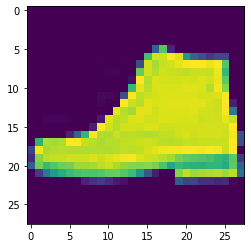

In [ ]:
# import numpy and matplot lib
# try to print one label and image in console
import numpy as np
np.set_printoptions(linewidth = 200) #This line of code will help to increase/decrease the width of output screen (https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html)
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

In [ ]:
# Data normalization
# Current data value lies between 0 to 255 now we will divide all the values by 255 after that the values will be between 0 to 1. 
# This process is called the normalization
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
"""
    Design the model
    Sequential: This defines a sequence of layers in NEURAL NETWORK
    Flatten: This will convert 2D(28*28) layer(image) into 1D(784)/vector/Layer(image)
    Dense: This is a layer of neurons. Each layer of neurons need a activation function to tell them what to do
    Relu: if X>0 then return X else return 0.
    softmax: it will pick the greatest/biggest value from output layer.
              if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05],
              it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- 
              The goal is to save a lot of coding!

"""
flattenLayer = tf.keras.layers.Flatten() # this will convert 2D array into vector(1D array)
hiddenLayer = tf.keras.layers.Dense(128, activation=tf.nn.relu) # this is hidden layer
outputLayer = tf.keras.layers.Dense(10, activation=tf.nn.softmax) # this is output layer, we can say this is the final layer
model = tf.keras.Sequential([flattenLayer, hiddenLayer, outputLayer])


In [ ]:
# this will compile the model with optimizer function
model.compile(optimizer= tf.optimizers.Adam(), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
#this will train the model with 5 epochs
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6349 - accuracy: 0.7767
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3841 - accuracy: 0.8621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8722
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2998 - accuracy: 0.8886


In [ ]:
# Test the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8672


[0.3679210841655731, 0.8672000169754028]

#EXERCISE

In [ ]:
classifications = model.predict(test_images)

print('classification Size : ' , classifications.size)
print('classification[0] Size : ' , classifications[10].size)
print('classification value : ' , classifications[10])

classification Size :  100000
classification[0] Size :  10
classification value :  [7.4725071e-06 1.0758809e-07 4.9957283e-02 3.0653115e-07 9.4374686e-01 4.3916621e-08 6.2870509e-03 5.0790633e-10 8.8739779e-07 3.1775071e-09]


In [ ]:
print(test_labels[9999])

5


##Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [ ]:
import tensorflow as tf
print(tf.__version__)
#load dataset
mnist = tf.keras.datasets.mnist
#segrigate the data
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
#Normalize the Data
training_images = training_images/255.0
test_images = test_images/255.0
#Create Layers
flattenLayer = tf.keras.layers.Flatten() # this will convert 2D array into vector(1D array)
hiddenLayer = tf.keras.layers.Dense(1024, activation=tf.nn.relu) # this is hidden layer
outputLayer = tf.keras.layers.Dense(10, activation=tf.nn.softmax) # this is output layer, we can say this is the final layer
#create Modal
model = tf.keras.Sequential([flattenLayer, hiddenLayer, outputLayer])
#compile Modal
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy')
#Train Modal
model.fit(training_images, training_labels, epochs=5)
#Test Modal
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3128
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0750
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0457
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0323
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0855
[1.2128645e-08 5.6859149e-09 6.3024856e-07 4.4190057e-02 4.4553811e-13 3.9782936e-08 5.0133725e-13 9.5580369e-01 9.2152241e-08 5.5133833e-06]
7


##Exercise 8:  (Callback Example)

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print("training_images : " , training_images.size)
print("training_labels : " , training_labels.size)
print("test_images : " , test_images.size)
print("test_labels : " , test_labels.size)
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.4.1
training_images :  47040000
training_labels :  60000
test_images :  7840000
test_labels :  10000
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5816
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3665

Reached 60% accuracy so cancelling training!


In [12]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    # YOUR CODE SHOULD START HERE
    x_train = x_train/255.0
    x_test = x_test/255.0
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation= tf.nn.relu),
        tf.keras.layers.Dense(10, activation= tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
                x_train, y_train, epochs= 5, callbacks=[callbacks]
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['accuracy'][-1]

train_mnist()

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.8967
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0843 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0340 - accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9917

Reached 99% accuracy so cancelling training!


([0, 1, 2, 3, 4], 0.9904666543006897)